# <center> <h1>Assignment 3</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

Click the link below and download the file named "auto_mpg_modified.csv".<br/>
Link: https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_modified.csv<br/>
You can find more info about the data set <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">here</a>. 

### Questions:
1) Read the file and create a dataframe and name it "df".<br/>
2) Perform the following data preprocessing:<br/>
a) Remove uncessary column(s) that cannot be used for training any models. Remove from df. Explain why you choose those column(s).<br/>
b) Determine any missing data point in df. Replace those missing data points with an imputated value. <br/>
c) Make sure columns labaled as "multi-valued discrete" are of integer type while "continuous" ones are of float type. You can read the column labels in this <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">file</a>. The final dataframe should be named "df_clean".<br/>
3) Prepare the following dataframes.<br/> 
a) Create a dataframe called "response" including only the column "mpg".<br/>
b) Create a dataframe called "features" with the remaining columns.<br/>
c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"<br/>
d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"<br/>
e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"<br/>
f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"<br/>
4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above. <br/>
5) Produce predictions over the test data.<br/>
6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.<br/>
7) Normalize the data stored in df_clean. <br/>
8) Fit a multiple linear regression model using the normalized data.<br/>
9) Extract Feature Importance. That is, report the coefficients (i.e. estimated parameters) of the fit model.<br/>
10) Summarize results with a bar chart.<br/>

In [1]:
#work on your code here and after.
#1) Read the file and create a dataframe and name it "df".
import pandas as pd
df = pd.read_csv("auto_mpg_modified.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693,11.5,70,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436,11.0,70,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433,12.0,70,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449,10.5,70,1.0,ford torino


In [2]:
# 2) Perform the following data preprocessing:
# a) Remove uncessary column(s) that cannot be used for training any models. Remove from df. Explain why you choose those column(s).
#'name' column should be dropped as it doesnot contribute to training a model. 

df_clean = df.drop(axis = 1, columns = 'name')
df_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504,12.0,70,1.0
1,15.0,8.0,350.0,165.0,3693,11.5,70,1.0
2,18.0,8.0,318.0,150.0,3436,11.0,70,1.0
3,16.0,8.0,304.0,150.0,3433,12.0,70,1.0
4,17.0,8.0,302.0,140.0,3449,10.5,70,1.0


In [3]:
df_clean.isnull().sum()

mpg             0
cylinders       4
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          7
dtype: int64

In [4]:
# b) Determine any missing data point in df. Replace those missing data points with an imputated value.
#checking if there are any missing rows for all columns.
bool_df = ~df_clean.isna() #True means there is a value. False means the element is na.
#checking each row and mark it as false if there is any rows with all columns false

ps = bool_df.apply(any, axis = 1) #this is a pandas series of type bool. False if all rows are false.
df_clean = df_clean[ps] #grab the ones with True rows only. That is drop rows with all columns NaNs.

column_names = df_clean.columns.to_list()

print('Columns that have missing values:')
for col_name in column_names:
    if(any(df_clean[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

Columns that have missing values:
cylinders has a missing value.
horsepower has a missing value.
origin has a missing value.
End


In [5]:
unique_horsepower = len(df_clean.horsepower.unique().tolist())
unique_cylinders = len(df_clean.cylinders.unique().tolist())
unique_origin = len(df_clean.origin.unique().tolist())
print('horsepower has '+str(unique_horsepower)+' different values.')
print('cylinders has '+str(unique_cylinders)+' different values.')
print('origin has '+str(unique_origin)+' different values.')

horsepower has 94 different values.
cylinders has 6 different values.
origin has 4 different values.


In [6]:
#column 'horsepower' has many different values. Filling missing values from this column according to the following ad-hoc imputation technique: 
#A random value withdrawn from the set (mean - standard deviation, mean + standard deviation).
#which ones are NaNs
na_horsepower = df_clean.horsepower.isna()
#mean and std of all ages
mean_horsepower = df_clean.horsepower.mean()
std_horsepower = df_clean.horsepower.std()
#how many NaNs
size_na_horsepower = sum(na_horsepower)


#(mean - standard deviation, mean + standard deviation) as many as size
import numpy as np
#randint() gives an array which can be inserted in Pandas series
ps_rand_horsepower_array = np.random.randint(max(0, mean_horsepower - std_horsepower), mean_horsepower + std_horsepower, size = size_na_horsepower)
ps_rand_horsepower_array = ps_rand_horsepower_array.astype(float)#currently the column is of type float
#Only replace for those NaNs.
# ps_horsepower[na_horsepower] = ps_rand_horsepower_array
df_clean.loc[na_horsepower, 'horsepower'] = ps_rand_horsepower_array


In [7]:
#replacing 'cylinders' and 'origin' feature values with the most common values.
most_one_cylinders = df['cylinders'].value_counts().idxmax() 
most_one_origin = df['origin'].value_counts().idxmax() 
df_clean['cylinders'] = df['cylinders'].fillna(most_one_cylinders)
df_clean['origin'] = df['origin'].fillna(most_one_origin)

In [8]:
#multi-valued discrete ones: 
discrete_list = ['cylinders', 'year', 'origin']
#continuous ones:
column_names = set(df_clean.columns.to_list())
continuous_list = list(column_names - set(discrete_list))

df_clean[discrete_list] = df_clean[discrete_list].astype(int)
df_clean[continuous_list] = df_clean[continuous_list].astype(float)

print(df_clean[discrete_list].info())
print()
print(df_clean[continuous_list].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cylinders  398 non-null    int32
 1   year       398 non-null    int32
 2   origin     398 non-null    int32
dtypes: int32(3)
memory usage: 7.8 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acceleration  398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   mpg           398 non-null    float64
dtypes: float64(5)
memory usage: 18.7 KB
None


In [9]:
# 3) Prepare the following dataframes.
# a) Create a dataframe called "response" including only the column "mpg".
response = df_clean[['mpg']]
response.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [10]:
# b) Create a dataframe called "features" with the remaining columns.
features = df_clean.iloc[:,1:]
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
# c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"
# d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"
# e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"
# f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

print("Number of total rows in complete features dataframe: ", len(features))
print("Number of total rows in features_train dataframe: ", len(features_train))
print("Number of total rows in features_test dataframe: ", len(features_test))
print("Number of total rows in complete response dataframe: ", len(response))
print("Number of total rows in response_train dataframe: ", len(response_train))
print("Number of total rows in response_test dataframe: ", len(response_test))

Number of total rows in complete features dataframe:  398
Number of total rows in features_train dataframe:  318
Number of total rows in features_test dataframe:  80
Number of total rows in complete response dataframe:  398
Number of total rows in response_train dataframe:  318
Number of total rows in response_test dataframe:  80


In [12]:
#4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above.
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train) #first input is features, second input is response

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#5) Produce predictions over the test data.
response_pred = my_linear_regression.predict(features_test)

In [14]:
#6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 2.7105097067829886
Mean Squared Error: 11.563350950592172
Root Mean Squared Error: 3.400492751145365


In [15]:
#7) Normalize the data stored in df_clean.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df_clean)
df_normalized = pd.DataFrame(data_normalized, columns = df_clean.columns.to_list())
df_normalized.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [16]:
#8) Fit a multiple linear regression model using the normalized data.
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
features = df_normalized.iloc[:,1:] #All columns after the first column in dataframe account for features
response = df_normalized[['mpg']]
my_linear_regression.fit(features, response) #first input is features, second input is response

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# 9) Extract Feature Importance. That is, report the coefficients (i.e. estimated parameters) of the fit model.
importance = my_linear_regression.coef_[0]
feature_names = df_normalized.columns.to_list()
feature_names.remove('mpg')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

cylinders: -0.05562
displacement: 0.18718
horsepower: -0.03948
weight: -0.63958
acceleration: 0.05447
year: 0.24275
origin: 0.07133


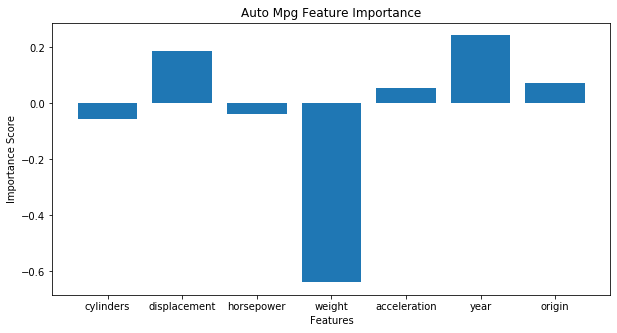

In [18]:
# 10) Summarize results with a bar chart.
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Auto Mpg Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

In [19]:
#11) Analyze the results from the bar chart. Drop one or two least important features from df_clean.
#Drop 'cylinders' and 'acceleration'
df_clean.drop(axis=1, columns = ['cylinders', 'acceleration'], inplace = True)

In [20]:
df_clean.head()

,mpg,displacement,horsepower,weight,year,origin
0,18.0,307.0,130.0,3504.0,70,1
1,15.0,350.0,165.0,3693.0,70,1
2,18.0,318.0,150.0,3436.0,70,1
3,16.0,304.0,150.0,3433.0,70,1
4,17.0,302.0,140.0,3449.0,70,1


In [21]:
# 12) Repeat Questions 3 - 6 and report the updated metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error. Compare the updated metric results against the previous ones.
    # 3) Prepare the following dataframes.
    # a) Create a dataframe called "response" including only the column "mpg".
    # b) Create a dataframe called "features" with the remaining columns.
    # c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"
    # d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"
    # e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"
    # f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"
    # 4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above.
    # 5) Produce predictions over the test data.
    # 6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.
    
# 3) Prepare the following dataframes.
# a) Create a dataframe called "response" including only the column "mpg".
response = df_clean[['mpg']]
response.head()

# b) Create a dataframe called "features" with the remaining columns.
features = df_clean.iloc[:,1:]

# c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"
# d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"
# e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"
# f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

#4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above.
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train) #first input is features, second input is response

#5) Produce predictions over the test data.
response_pred = my_linear_regression.predict(features_test)

#6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))



Mean Absolute Error: 2.6614071776530395
Mean Squared Error: 11.263615357846534
Root Mean Squared Error: 3.3561310102328448
